In [289]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

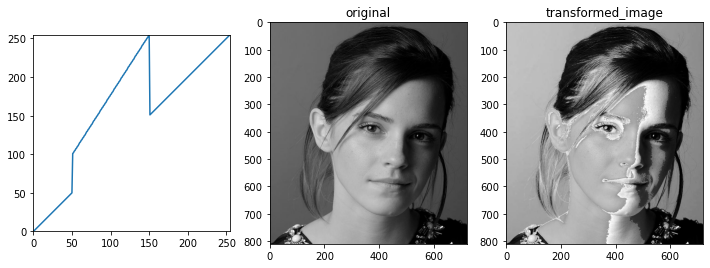

In [318]:
#Question 01
c=np.array([(50,50),(50,100),(150,255),(150,150)])
t1=np.linspace(0,c[0,1],c[0,1]+1-0).astype('uint8')
t3=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t5=np.linspace(c[2,0]+1,c[2,1],c[2,1]-c[3,0]).astype('uint8')
transform=np.concatenate((t1,t3),axis=0).astype('uint8')
transform=np.concatenate((transform,t5),axis=0).astype('uint8')
fig,ax=plt.subplots(1,3,figsize=(12,6))
ax[0].plot(transform)
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
img_org= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\emma_gray.jpg")
assert img_org is not None
ax[1].imshow(img_org)
ax[1].set_title('original')
ax[1].set_aspect('equal')
assert len(transform) ==256
img_transformed=cv.LUT(img_org,transform)
ax[2].imshow(img_transformed)
ax[2].set_title('transformed_image')
ax[2].set_aspect('equal')
assert len(transform) ==256


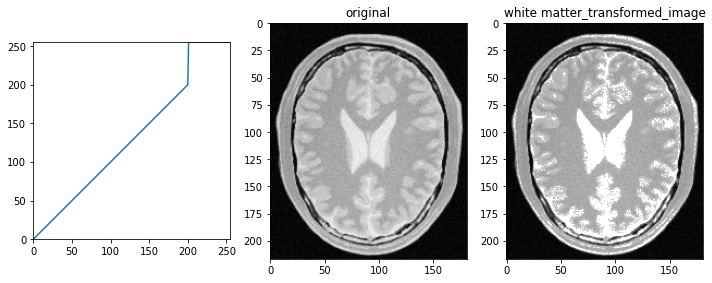

In [319]:
#question 02 part a
t1=np.linspace(0,50,51).astype('uint8')
t3=np.linspace(51,200,200-50).astype('uint8')
t5=np.linspace(255,255,255-200).astype('uint8')
transform=np.concatenate((t1,t3),axis=0).astype('uint8')
transform=np.concatenate((transform,t5),axis=0).astype('uint8')
fig,ax=plt.subplots(1,3,figsize=(12,6))
ax[0].plot(transform)
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
img_org= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\brain_proton_density_slice.png")
assert img_org is not None
ax[1].imshow(img_org)
ax[1].set_title('original')
ax[1].set_aspect('equal')
assert len(transform) ==256
img_transformed=cv.LUT(img_org,transform)
ax[2].imshow(img_transformed)
ax[2].set_title('white matter_transformed_image')
ax[2].set_aspect('equal')
assert len(transform) ==256


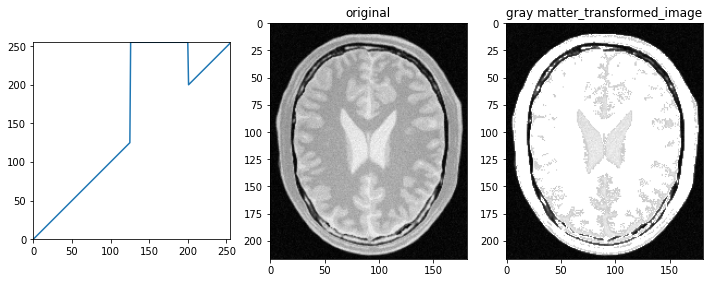

In [320]:
#question 2 part b
t1=np.linspace(0,125,126).astype('uint8')
t3=np.linspace(255,255,200-125).astype('uint8')
t5=np.linspace(200,255,255-200).astype('uint8')
transform=np.concatenate((t1,t3),axis=0).astype('uint8')
transform=np.concatenate((transform,t5),axis=0).astype('uint8')
fig,ax=plt.subplots(1,3,figsize=(12,6))
ax[0].plot(transform)
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
img_org= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\brain_proton_density_slice.png")
assert img_org is not None
ax[1].imshow(img_org)
ax[1].set_title('original')
ax[1].set_aspect('equal')
assert len(transform) ==256
img_transformed=cv.LUT(img_org,transform)
ax[2].imshow(img_transformed)
ax[2].set_title('gray matter_transformed_image')
ax[2].set_aspect('equal')
assert len(transform) ==256


Text(0.5, 1.0, 'histogram of gamma corrected image')

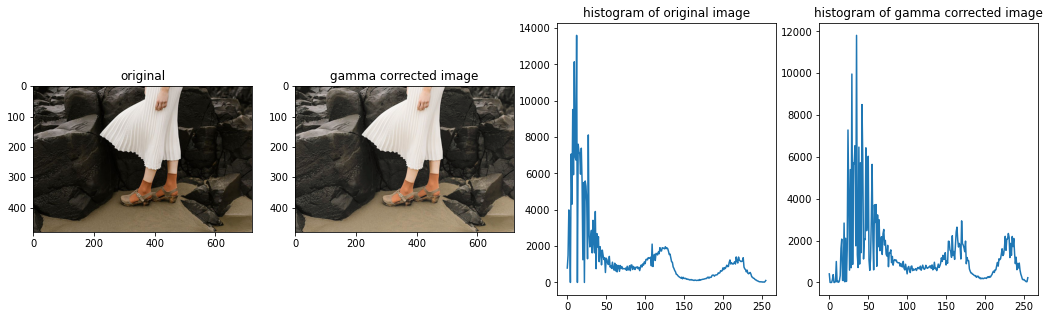

In [302]:
#question 3
img_org= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\highlights_and_shadows.jpg")
assert img_org is not None
img_org1=cv.cvtColor(img_org,cv.COLOR_BGR2Lab)
img_org=cv.cvtColor(img_org,cv.COLOR_BGR2RGB)
l_channel1,a_channel1,b_channel1 = cv.split(img_org1)
gamma=0.65;
table=np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma=cv.LUT(l_channel1,table)
newLabImage = cv.merge((img_gamma,a_channel1,b_channel1))
RGB_converted_img=cv.cvtColor(newLabImage,cv.COLOR_Lab2RGB)
fig,ax=plt.subplots(1,4,figsize=(18,5))
ax[0].imshow(img_org)
ax[0].set_title('original')
ax[0].set_aspect('equal')
ax[1].imshow(RGB_converted_img)
ax[1].set_title('gamma corrected image')
ax[1].set_aspect('equal')
hist_orig=cv.calcHist([img_org1],[0],None,[256],[0,256])
hist_gamma=cv.calcHist([RGB_converted_img],[0],None,[256],[0,256])
ax[2].plot(hist_orig)
ax[2].set_title('histogram of original image')
ax[3].plot(hist_gamma)
ax[3].set_title('histogram of gamma corrected image')


Text(0.5, 1.0, 'histogram of equalized image')

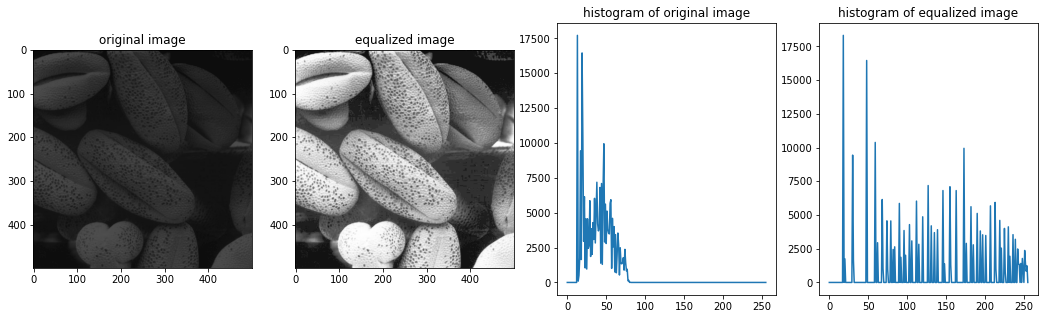

In [301]:
#question 4
img_org= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\shells.png",cv.IMREAD_GRAYSCALE)
assert img_org is not None
org_hist = cv.calcHist([img_org],[0],None,[256],[0,256]) 
cdf_hist = np.cumsum(org_hist)                        
hist_normalized = (cdf_hist * 255 / cdf_hist.max()).astype(int) 
equalized_img = cv.LUT(img_org, hist_normalized).astype('uint16')
eq_hist = cv.calcHist([equalized_img],[0],None,[256],[0,256])
fig,ax=plt.subplots(1,4,figsize=(18,5))
img_org1=cv.cvtColor(img_org,cv.COLOR_BGR2RGB)
ax[0].imshow(img_org1)
ax[0].set_title('original image')
ax[0].set_aspect('equal')
img_eq=cv.cvtColor(equalized_img,cv.COLOR_BGR2RGB)
ax[1].imshow(img_eq)
ax[1].set_title('equalized image')
ax[1].set_aspect('equal')
ax[2].plot(org_hist)
ax[2].set_title('histogram of original image')
ax[3].plot(eq_hist)
ax[3].set_title('histogram of equalized image')


after zoom (1080, 1920, 3)
Before zoom (270, 480, 3)
after zoom (1200, 1920, 3)
Before zoom (300, 480, 3)
after zoom (1460, 2400, 3)
Before zoom (365, 600, 3)


Text(0.5, 1.0, 'Before Zoom image')

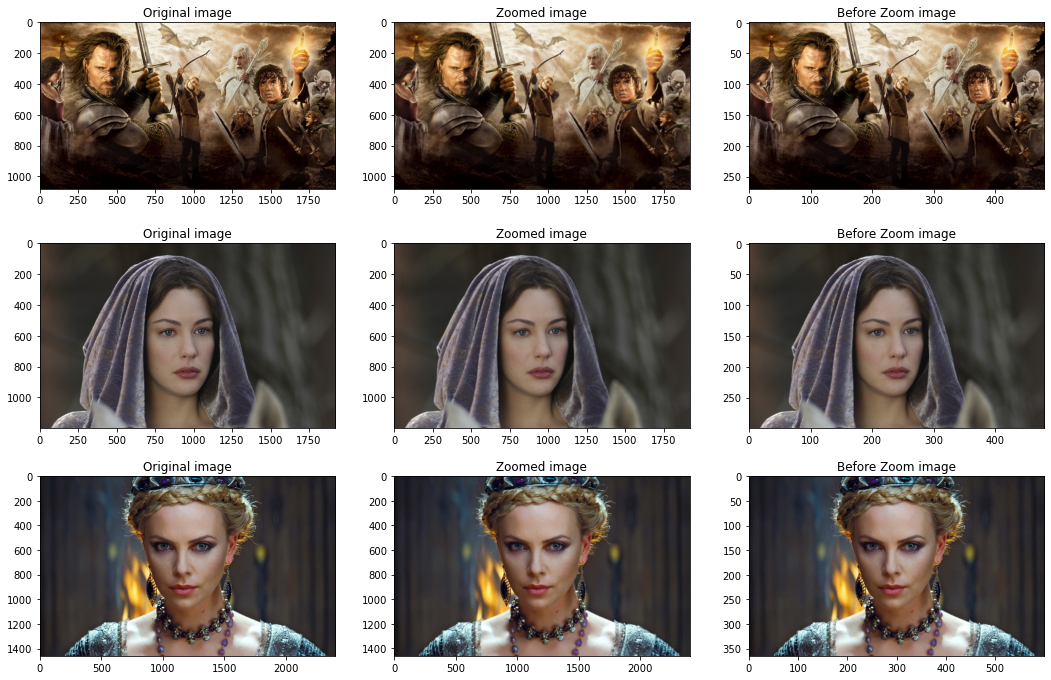

In [306]:
#question 5
img_org1= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im01.png")
img_zoomed_out1=cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im01small.png")
img_org2= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im02.png")
img_zoomed_out2=cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im02small.png")
img_org3= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im03.png")
img_zoomed_out3=cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im03small.png")
def nearest_neighbour(scale, im):
    rows = int(scale*im.shape[0])
    cols = int(scale*im.shape[1])    
    zoomed = np.zeros((rows,cols,3),dtype = im.dtype)
    for i in range(rows):
        for j in range(cols):
            zoomed[i,j] = im[int(i/scale),int(j/scale)]
    return zoomed
scale=4
img_zoomed1 = nearest_neighbour(scale, img_zoomed_out1)
img_zoomed2 = nearest_neighbour(scale, img_zoomed_out2)
img_zoomed3 = nearest_neighbour(scale, img_zoomed_out3)
print("after zoom",img_zoomed1.shape)
print("Before zoom",img_zoomed_out1.shape)
print("after zoom",img_zoomed2.shape)
print("Before zoom",img_zoomed_out2.shape)
print("after zoom",img_zoomed3.shape)
print("Before zoom",img_zoomed_out3.shape)
fig,ax = plt.subplots(3,3, figsize = (18,12))
img_org1=cv.cvtColor(img_org1,cv.COLOR_BGR2RGB)
ax[0,0].imshow(img_org1)
ax[0,0].set_title("Original image")
img_org2=cv.cvtColor(img_org2,cv.COLOR_BGR2RGB)
ax[1,0].imshow(img_org2)
ax[1,0].set_title("Original image")
img_org3=cv.cvtColor(img_org3,cv.COLOR_BGR2RGB)
ax[2,0].imshow(img_org3)
ax[2,0].set_title("Original image")
img_zoomed1=cv.cvtColor(img_zoomed1,cv.COLOR_BGR2RGB)
ax[0,1].imshow(img_zoomed1)
ax[0,1].set_title("Zoomed image")
img_zoomed2=cv.cvtColor(img_zoomed2,cv.COLOR_BGR2RGB)
ax[1,1].imshow(img_zoomed2)
ax[1,1].set_title("Zoomed image")
img_zoomed3=cv.cvtColor(img_zoomed3,cv.COLOR_BGR2RGB)
ax[2,1].imshow(img_zoomed3)
ax[2,1].set_title("Zoomed image")
img_zoomed_out1=cv.cvtColor(img_zoomed_out1,cv.COLOR_BGR2RGB)
ax[0,2].imshow(img_zoomed_out1)
ax[0,2].set_title("Before Zoom image")
img_zoomed_out2=cv.cvtColor(img_zoomed_out2,cv.COLOR_BGR2RGB)
ax[1,2].imshow(img_zoomed_out2)
ax[1,2].set_title("Before Zoom image")
img_zoomed_out3=cv.cvtColor(img_zoomed_out3,cv.COLOR_BGR2RGB)
ax[2,2].imshow(img_zoomed_out3)
ax[2,2].set_title("Before Zoom image")


In [216]:
ssd_1 = np.sum(((img_org1[:,:]-img_zoomed1[:,:])**2)/(3*255**2))/(img_org1.shape[0]*img_org1.shape[1])
ssd_2 = np.sum(((img_org2[:,:]-img_zoomed2[:,:])**2)/(3*255**2))/(img_org2.shape[0]*img_org2.shape[1])

print(ssd_1)
print(ssd_2)


0.0004811121335890117
0.0001830374980420636


after zoom (1080, 1920, 3)
Before zoom (270, 480, 3)
after zoom (1200, 1920, 3)
Before zoom (300, 480, 3)
after zoom (1460, 2400, 3)
Before zoom (365, 600, 3)


Text(0.5, 1.0, 'Before Zoom image')

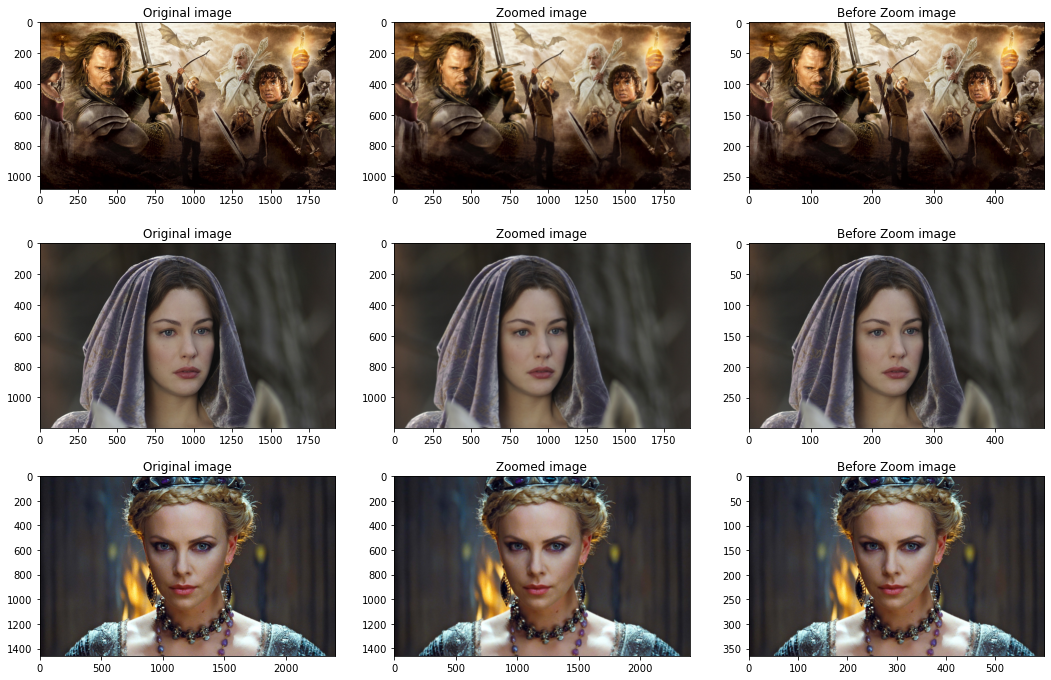

In [307]:
#bilinear interpolation
img_org1= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im01.png")
img_zoomed_out1=cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im01small.png")
img_org2= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im02.png")
img_zoomed_out2=cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im02small.png")
img_org3= cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im03.png")
img_zoomed_out3=cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\a1q5images\im03small.png")	
bilinear_img1 = cv.resize(img_zoomed_out1,( int(scale*img_zoomed_out1.shape[1]), int(scale*img_zoomed_out1.shape[0])), interpolation = cv.INTER_LINEAR)
bilinear_img2 = cv.resize(img_zoomed_out2,( int(scale*img_zoomed_out2.shape[1]), int(scale*img_zoomed_out2.shape[0])), interpolation = cv.INTER_LINEAR)
bilinear_img3 = cv.resize(img_zoomed_out3,( int(scale*img_zoomed_out3.shape[1]), int(scale*img_zoomed_out3.shape[0])), interpolation = cv.INTER_LINEAR)
print("after zoom",bilinear_img1.shape)
print("Before zoom",img_zoomed_out1.shape)
print("after zoom",bilinear_img2.shape)
print("Before zoom",img_zoomed_out2.shape)
print("after zoom",bilinear_img3.shape)
print("Before zoom",img_zoomed_out3.shape)
fig,ax = plt.subplots(3,3, figsize = (18,12))
img_org1=cv.cvtColor(img_org1,cv.COLOR_BGR2RGB)
ax[0,0].imshow(img_org1)
ax[0,0].set_title("Original image")
img_org2=cv.cvtColor(img_org2,cv.COLOR_BGR2RGB)
ax[1,0].imshow(img_org2)
ax[1,0].set_title("Original image")
img_org3=cv.cvtColor(img_org3,cv.COLOR_BGR2RGB)
ax[2,0].imshow(img_org3)
ax[2,0].set_title("Original image")
bilinear_img1=cv.cvtColor(bilinear_img1,cv.COLOR_BGR2RGB)
ax[0,1].imshow(bilinear_img1)
ax[0,1].set_title("Zoomed image")
bilinear_img2=cv.cvtColor(bilinear_img2,cv.COLOR_BGR2RGB)
ax[1,1].imshow(bilinear_img2)
ax[1,1].set_title("Zoomed image")
bilinear_img3=cv.cvtColor(bilinear_img3,cv.COLOR_BGR2RGB)
ax[2,1].imshow(bilinear_img3)
ax[2,1].set_title("Zoomed image")
img_zoomed_out1=cv.cvtColor(img_zoomed_out1,cv.COLOR_BGR2RGB)
ax[0,2].imshow(img_zoomed_out1)
ax[0,2].set_title("Before Zoom image")
img_zoomed_out2=cv.cvtColor(img_zoomed_out2,cv.COLOR_BGR2RGB)
ax[1,2].imshow(img_zoomed_out2)
ax[1,2].set_title("Before Zoom image")
img_zoomed_out3=cv.cvtColor(img_zoomed_out3,cv.COLOR_BGR2RGB)
ax[2,2].imshow(img_zoomed_out3)
ax[2,2].set_title("Before Zoom image")

In [217]:
ssd_1 = np.sum(((img_org1[:,:]-bilinear_img1[:,:])**2)/(3*255**2))/(img_org1.shape[0]*img_org1.shape[1])
ssd_2 = np.sum(((img_org2[:,:]-bilinear_img2[:,:])**2)/(3*255**2))/(img_org2.shape[0]*img_org2.shape[1])

print(ssd_1)
print(ssd_2)

0.0004775562417232686
0.00016429053061856562


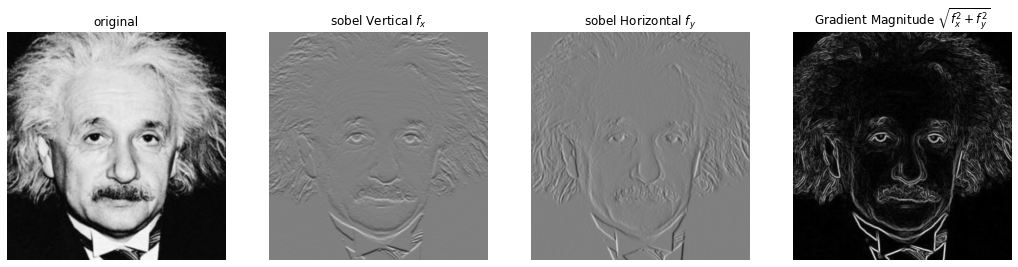

In [308]:
#question 6  part (a)
f=cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
f_x=cv.filter2D(f,-1,sobel_v)
sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
f_y=cv.filter2D(f,-1,sobel_h)
grad_mag=np.sqrt(f_x**2+f_y**2)
fig,ax=plt.subplots(1,4,figsize=(18,6))
ax[0].imshow(f,cmap="gray",vmin=0,vmax=255)
ax[0].set_title('original')
ax[1].imshow(f_x,cmap="gray",vmin=-1020,vmax=1020)
ax[1].set_title(r'sobel Vertical $f_x$')
ax[2].imshow(f_y,cmap="gray",vmin=-1020,vmax=1020)
ax[2].set_title(r'sobel Horizontal $f_y$')
ax[3].imshow(grad_mag,cmap="gray")
ax[3].set_title(r'Gradient Magnitude $\sqrt{f_x^2+f_y^2}$')
for i in range(4):
  ax[i].axis('off')
plt.show()


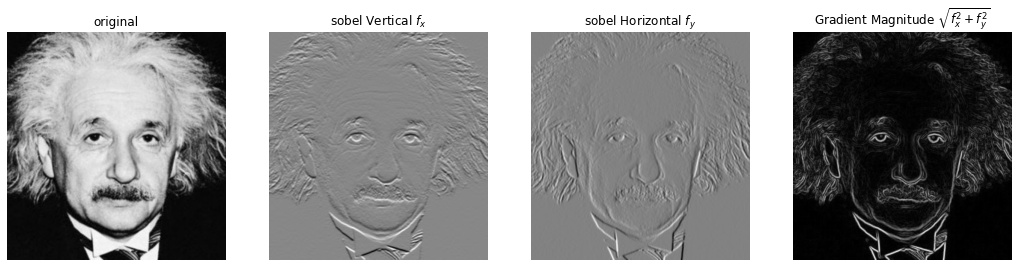

In [235]:
#question 6  part (b)
f=cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
def convolve(image, kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    pad = (kW - 1) // 2
    image = cv.copyMakeBorder(image, pad, pad, pad, pad,cv.BORDER_REPLICATE).astype(np.float32)
    output = np.zeros((iH, iW), dtype=np.float32)
    for y in np.arange(pad, iH + pad):
	    for x in np.arange(pad, iW + pad):
             roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
             k = (roi * kernel).sum()
             output[y - pad, x - pad] = k    
    output = (output * 255)
    return output
f_x=convolve(f,sobel_v)
f_y=convolve(f,sobel_h)
grad_mag=np.sqrt(f_x**2+f_y**2)
fig,ax=plt.subplots(1,4,figsize=(18,6))
ax[0].imshow(f,cmap="gray",vmin=0,vmax=255)
ax[0].set_title('original')
ax[1].imshow(f_x,cmap="gray")
ax[1].set_title(r'sobel Vertical $f_x$')
ax[2].imshow(f_y,cmap="gray")
ax[2].set_title(r'sobel Horizontal $f_y$')
ax[3].imshow(grad_mag,cmap="gray")
ax[3].set_title(r'Gradient Magnitude $\sqrt{f_x^2+f_y^2}$')
for i in range(4):
  ax[i].axis('off')
plt.show()

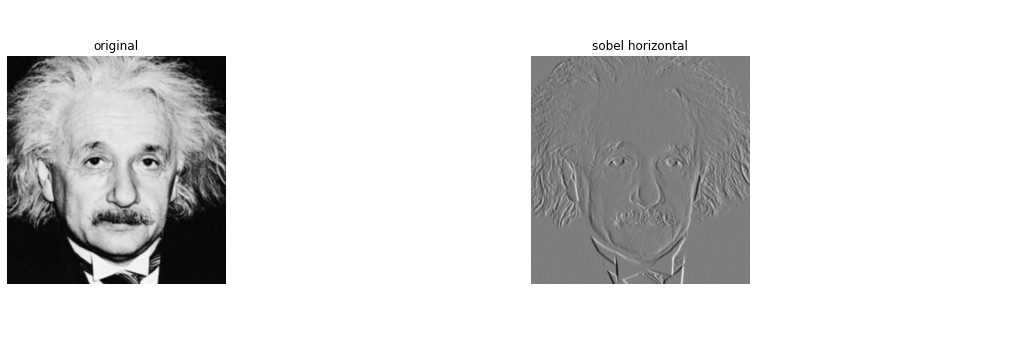

In [310]:
#question 6  part (c)
f=cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None
sobel_h=np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=np.float32)
def convolve(image, kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    pad = (kW - 1) // 2
    image = cv.copyMakeBorder(image, pad, pad, pad, pad,cv.BORDER_REPLICATE).astype(np.float32)
    output = np.zeros((iH, iW), dtype=np.float32)
    for y in np.arange(pad, iH + pad):
	    for x in np.arange(pad, iW + pad):
             roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
             k = (roi * kernel).sum()
             output[y - pad, x - pad] = k    
    output = (output * 255)
    return output
f_y=convolve(f,sobel_h)
fig,ax=plt.subplots(1,4,figsize=(18,6))
ax[0].imshow(f,cmap="gray",vmin=0,vmax=255)
ax[0].set_title('original')
ax[2].imshow(f_y,cmap="gray")
ax[2].set_title('sobel horizontal')
for i in range(4):
  ax[i].axis('off')
plt.show()

Text(0.5, 1.0, 'background image')

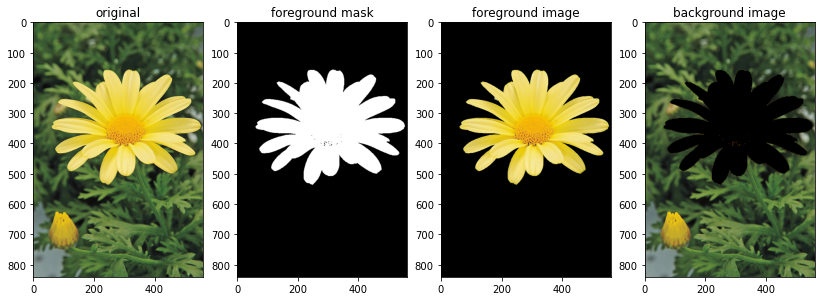

In [316]:
#question 7
f=cv.imread(r"C:\Users\User\Desktop\simulation\-Image-Processing-and-Machine-Vision\daisy.jpg").astype("uint8")
assert f is not None
mask = np.zeros(f.shape[:2], dtype="uint8")
rect = (60, 150, 560, 500)
fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")
(mask, bgModel, fgModel) = cv.grabCut(f, mask, rect, bgModel,fgModel, 10, mode=cv.GC_INIT_WITH_RECT)
#Foreground
f_mask = (mask == cv.GC_PR_FGD).astype("uint8") * 255
f_OutMask = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD), 0, 1)
f_OutMask = (f_OutMask * 255).astype("uint8")
img_foreground = cv.bitwise_and(f, f, mask=f_OutMask) 
#Background
b_mask = (mask == cv.GC_PR_BGD).astype("uint8") * 255
b_OutMask= np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 0, 1)
b_OutMask = (b_OutMask * 255).astype("uint8")
img_background = cv.bitwise_and(f, f, mask=b_OutMask)
fig,ax=plt.subplots(1,4,figsize=(14,6))
f=cv.cvtColor(f,cv.COLOR_BGR2RGB)
ax[0].imshow(f)
ax[0].set_title('original')
f_mask=cv.cvtColor(f_mask,cv.COLOR_BGR2RGB)
ax[1].imshow(f_mask)
ax[1].set_title('foreground mask')
img_foreground1=cv.cvtColor(img_foreground,cv.COLOR_BGR2RGB)
ax[2].imshow(img_foreground1)
ax[2].set_title('foreground image')
img_background1 =cv.cvtColor(img_background ,cv.COLOR_BGR2RGB)
ax[3].imshow(img_background1 )
ax[3].set_title('background image')

Text(0.5, 1.0, 'enhanced image')

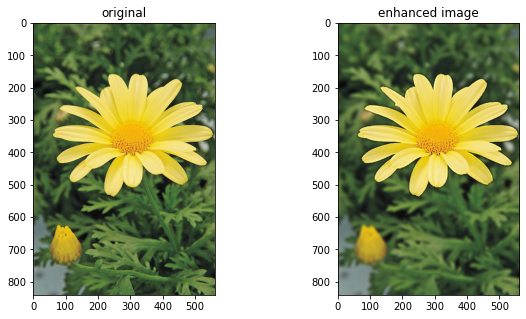

In [317]:
Blur_img=cv.GaussianBlur(img_background,(11,11),12)
enhanced_img=np.bitwise_or(img_foreground,Blur_img)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(f)
ax[0].set_title('original')
ax[1].imshow(cv.cvtColor(enhanced_img,cv.COLOR_BGR2RGB))
ax[1].set_title('enhanced image')